# **<div align="center">EDA FOR BINANCE COIN </div>**

In [10]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd

project_root = os.path.abspath("..")   
if project_root not in sys.path:
    sys.path.append(project_root)
from src.analysis.eda import (
    split_train_test,
    time_plots,
    matrix_correlation,
    scatter_matrix,
    decompose_time_series,
    returns_and_volatility
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Inicial Configuration**

In [2]:
CRYPTO_NAME = "binancecoin"
DATA_PATH = f"../data/processed/{CRYPTO_NAME}.csv"

## **Import dataset**

In [3]:
df = pd.read_csv(DATA_PATH)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date', drop=False).sort_index()
df.head()

,cryptocurrency_id,price_usd,market_cap,volume,date
date,,,,,
2025-02-05 12:03:40,4.0,571.03,8.327530e+10,1.241400e+09,2025-02-05 12:03:40
2025-02-06 12:03:40,4.0,571.03,8.327530e+10,1.241400e+09,2025-02-06 12:03:40
2025-02-07 12:03:40,4.0,571.03,8.327530e+10,1.241400e+09,2025-02-07 12:03:40
2025-02-08 12:03:40,4.0,571.03,8.327530e+10,1.241400e+09,2025-02-08 12:03:40
2025-02-09 12:03:40,4.0,571.03,8.327530e+10,1.241400e+09,2025-02-09 12:03:40


## **Split X_train, y_train, X_test and y_test**

In [4]:
train, test = split_train_test(df, 0.8)

## **Plots for train dataset**

In [5]:
FEATURES = ["price_usd", "market_cap", "volume"]

**Distributions and Correlations**

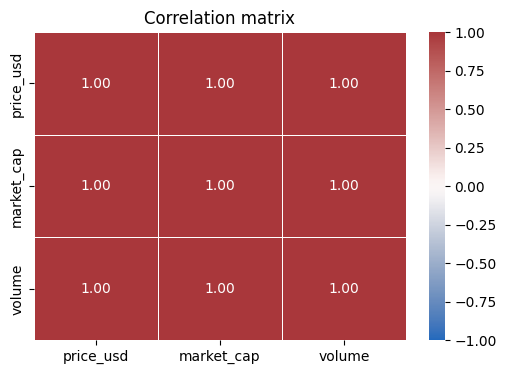

In [7]:
matrix_correlation(train, FEATURES)

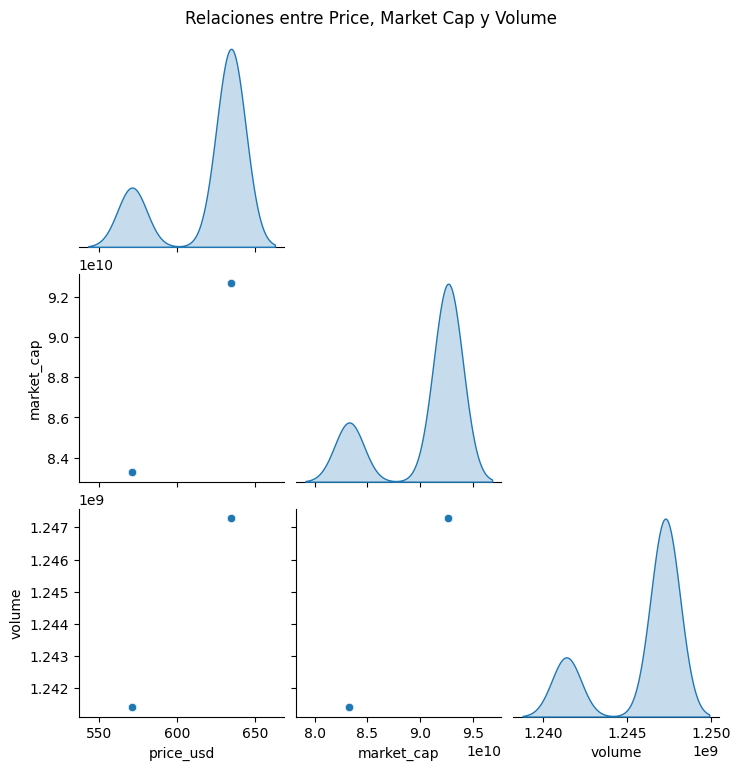

In [11]:
scatter_matrix(train, FEATURES)

**Time plots**

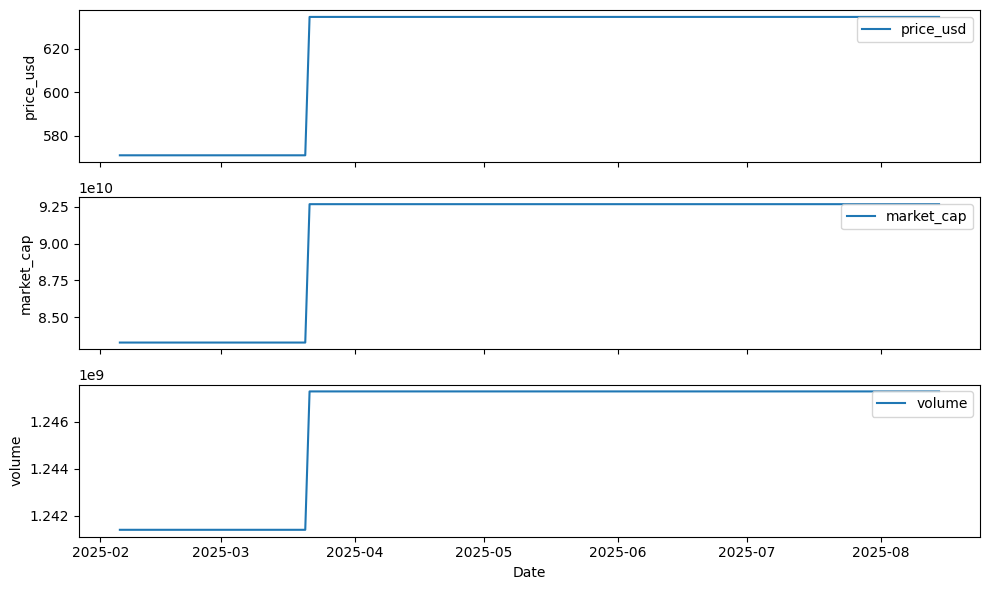

In [12]:
time_plots(train, FEATURES)

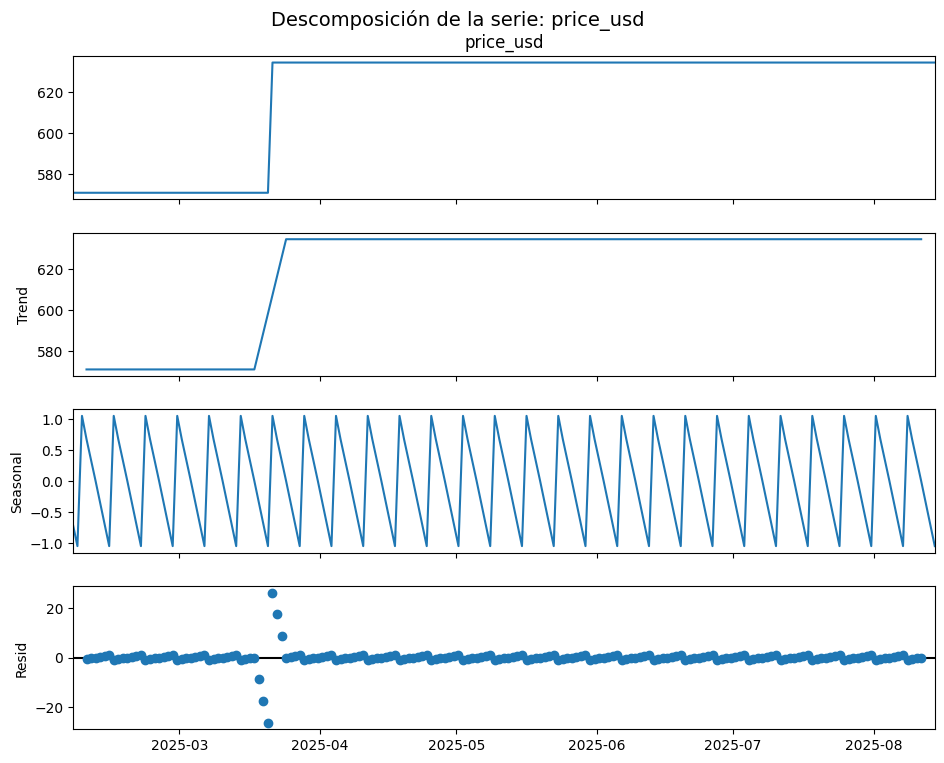

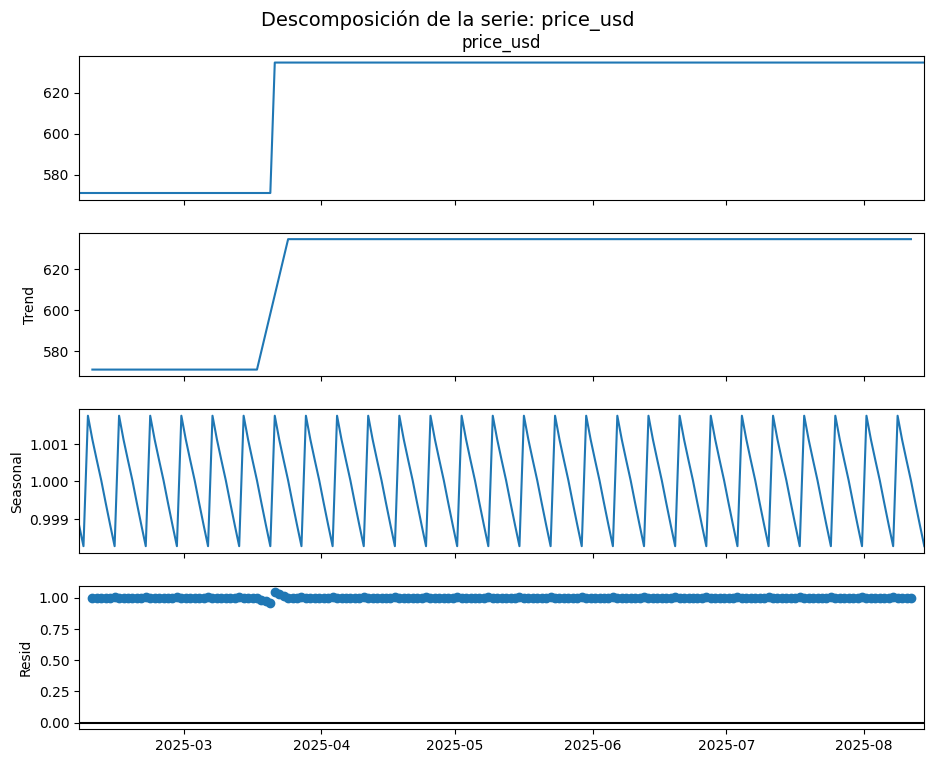

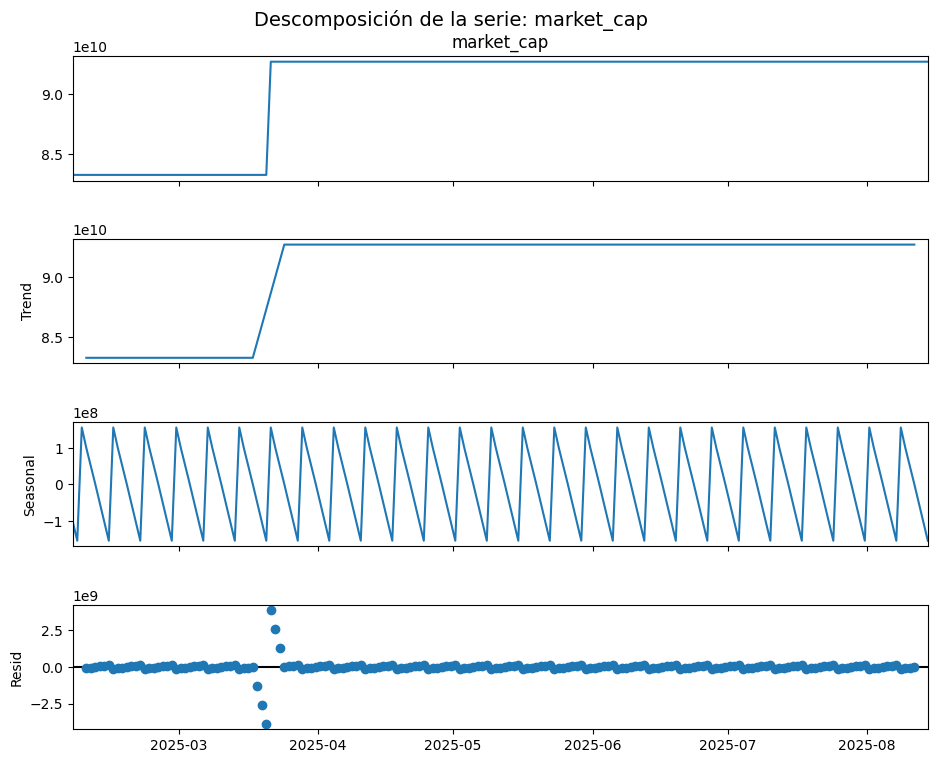

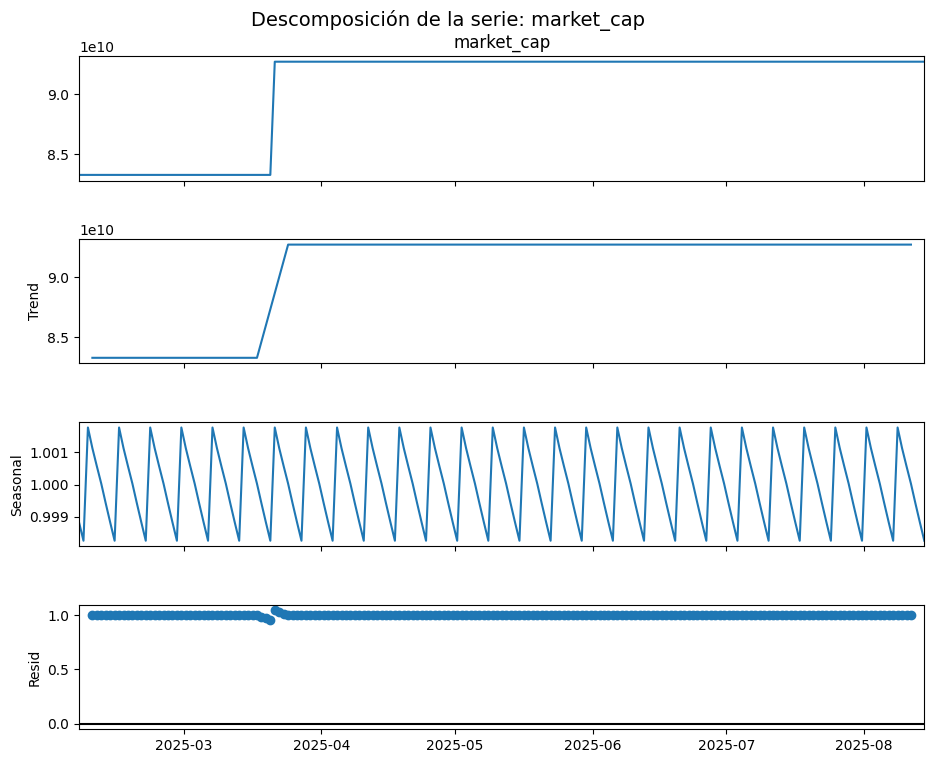

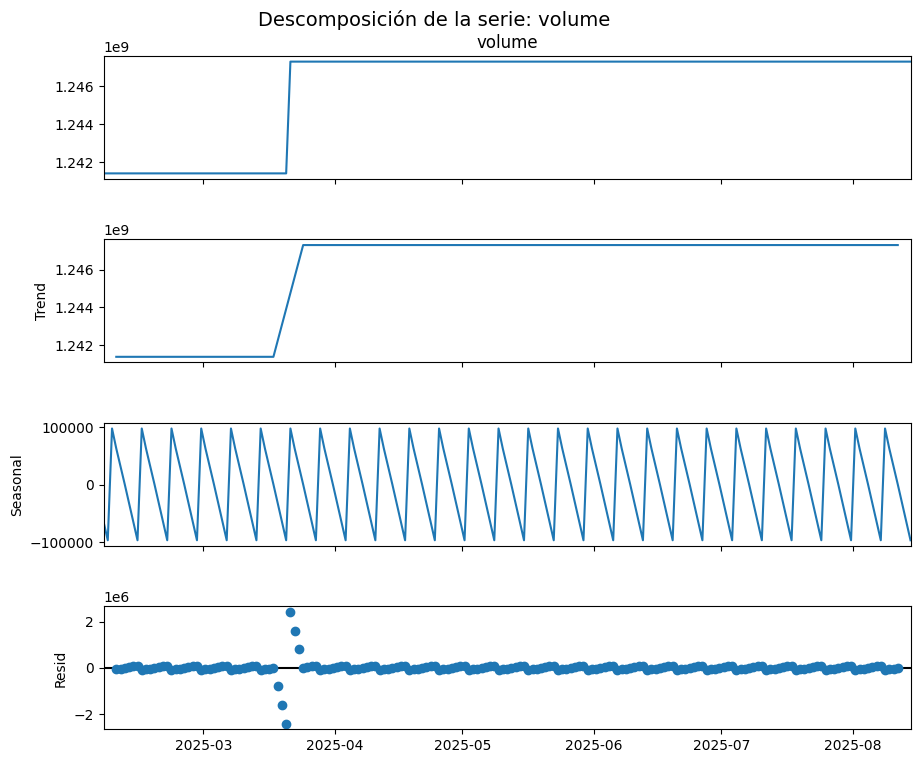

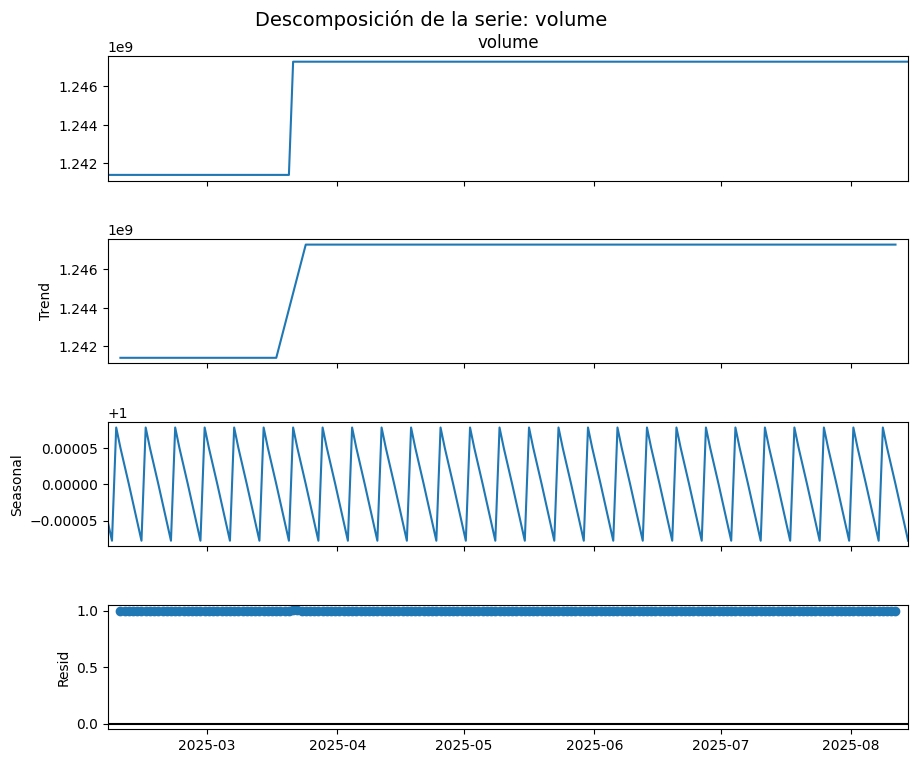

In [15]:
for col in FEATURES:
    decompose_time_series(train, col, model="additive", freq=7)
    decompose_time_series(train, col, model="multiplicative", freq=7)

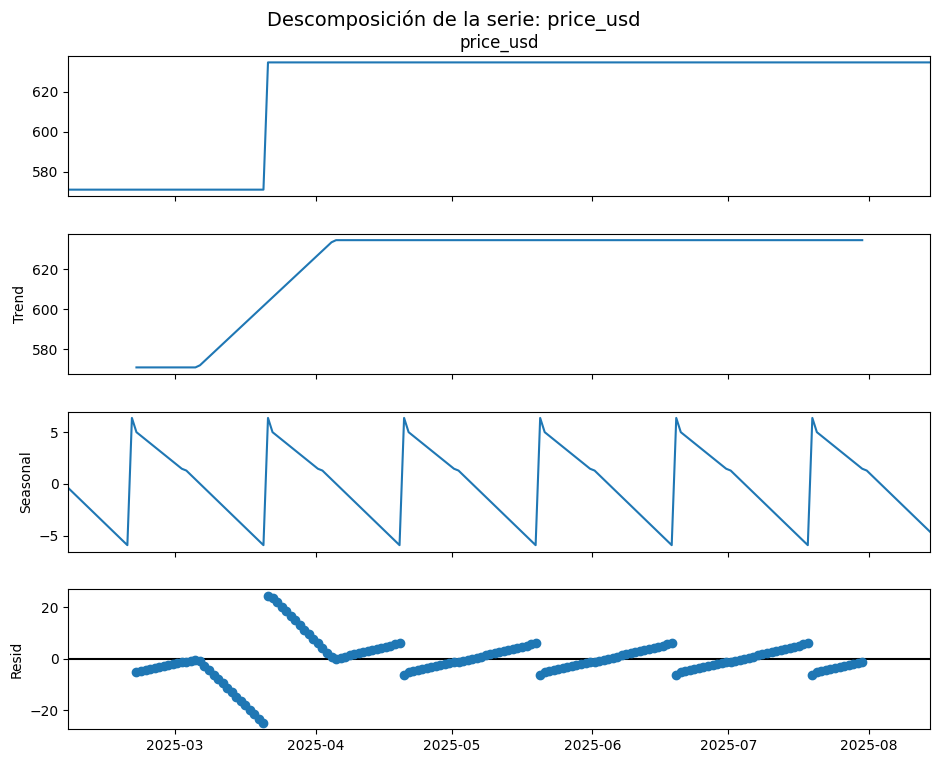

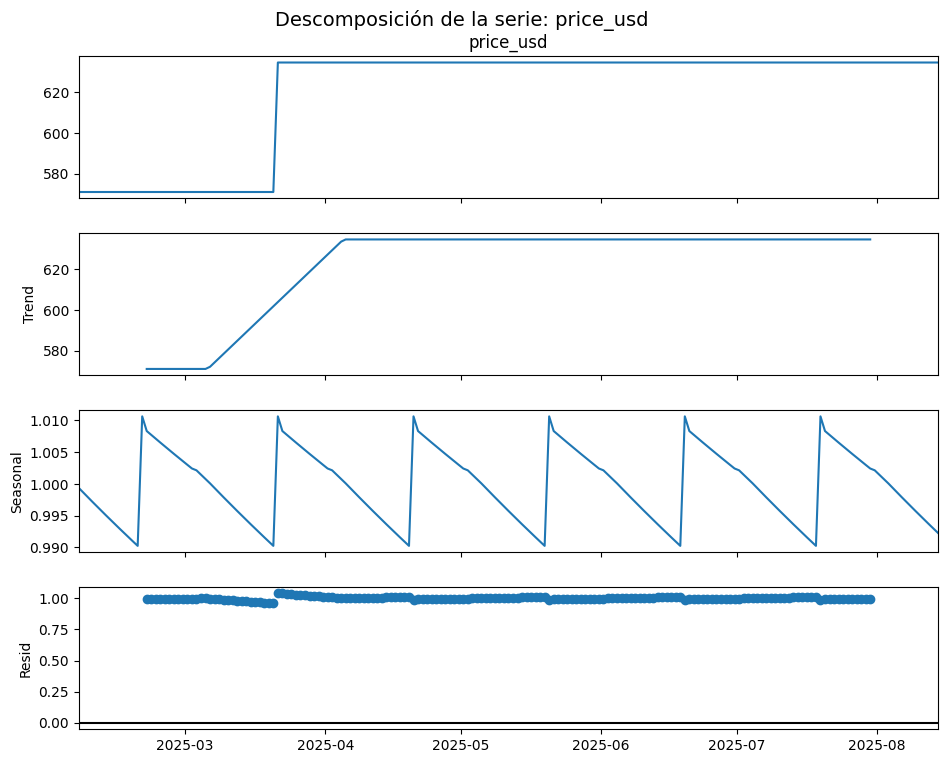

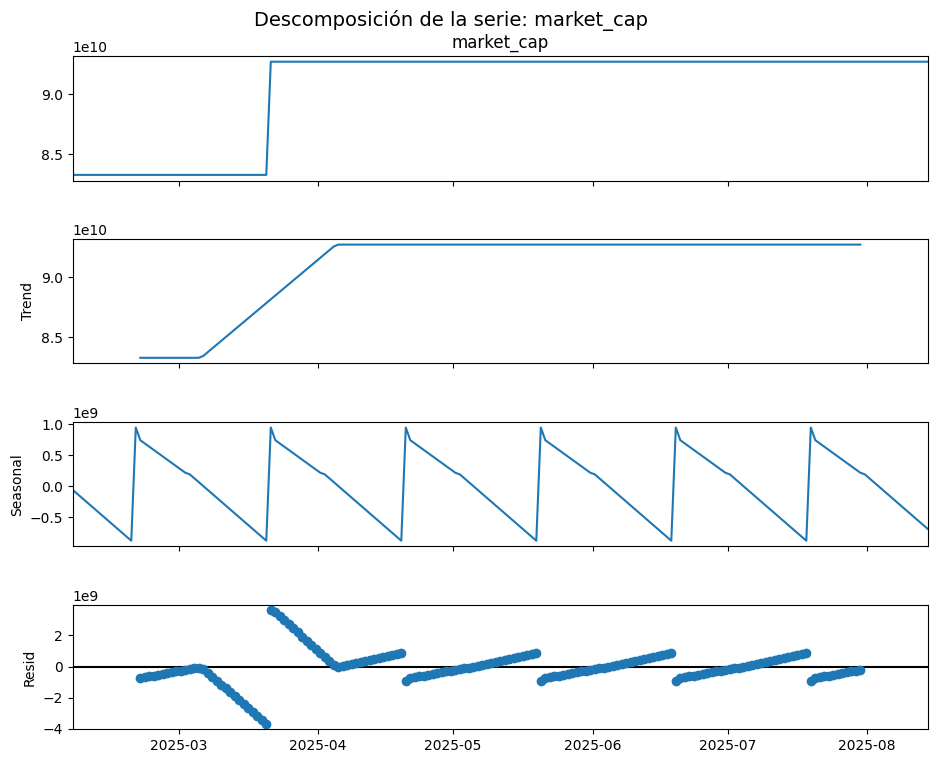

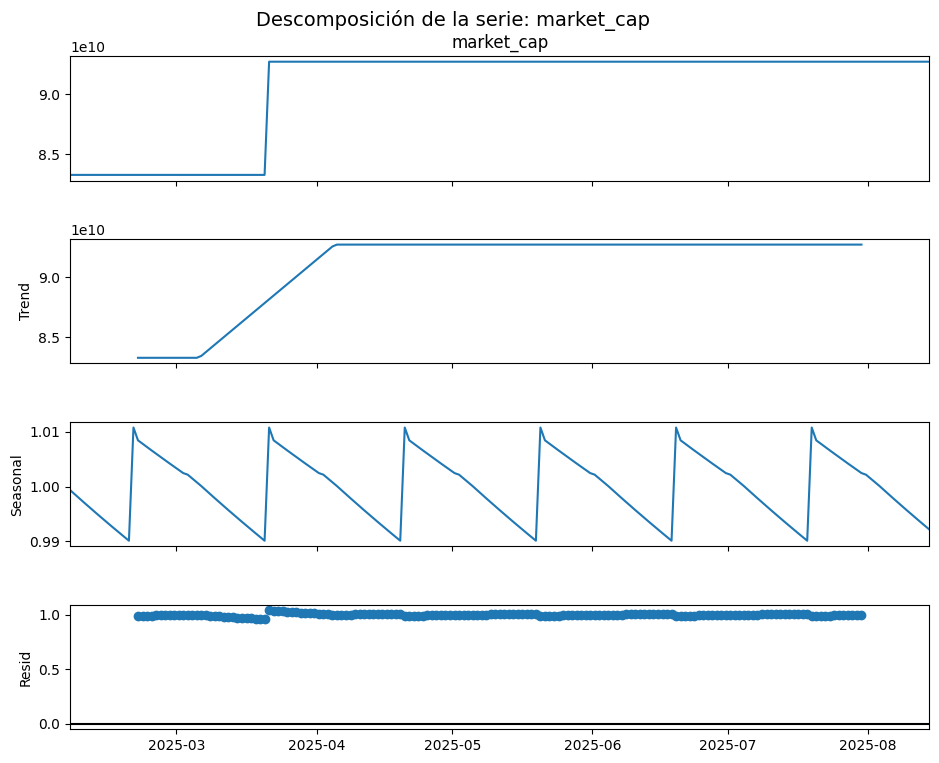

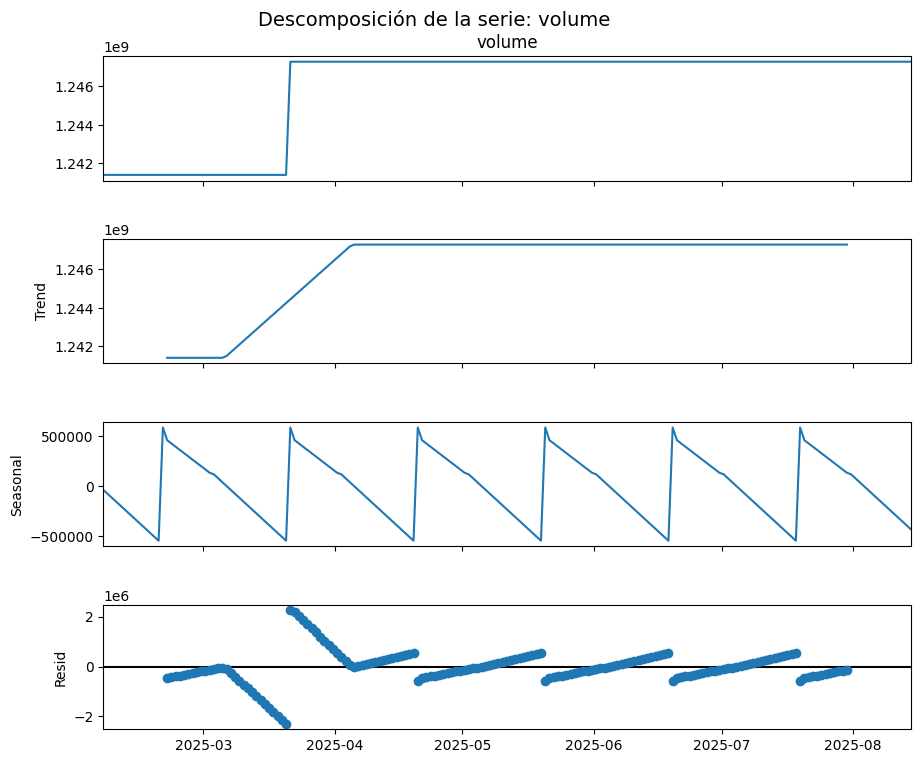

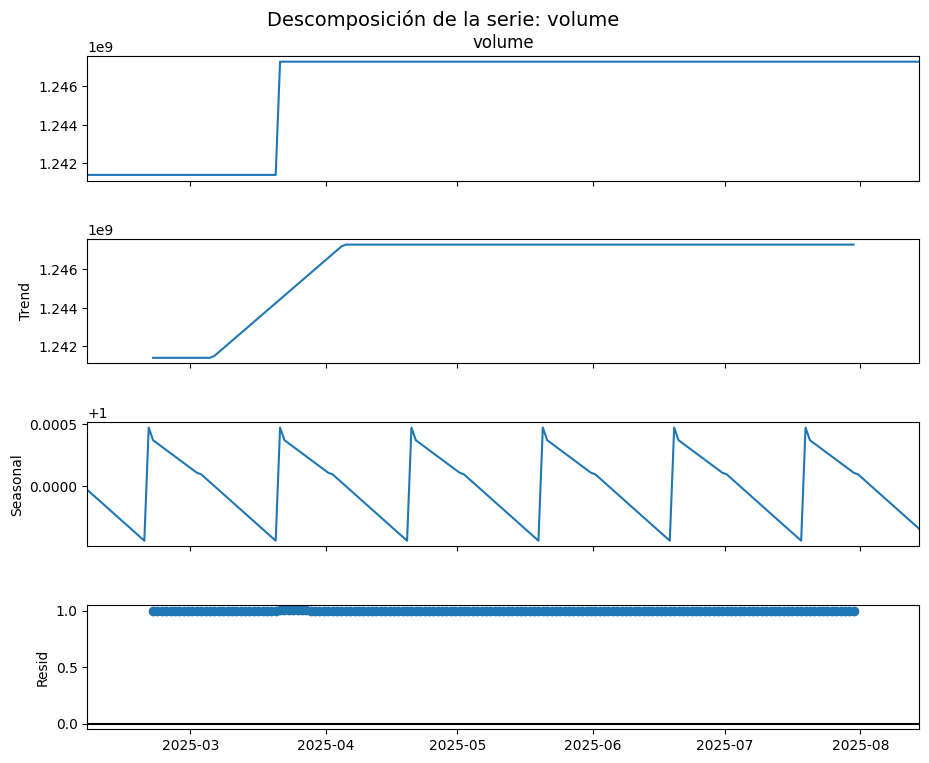

In [16]:
for col in FEATURES:
    decompose_time_series(train, col, model="additive", freq=30)
    decompose_time_series(train, col, model="multiplicative", freq=30)

The best frequency is each 7 days because detect the seasonility. Multiplicative is the best model because residuals don' have any pattern and they are centered in 1.

**Retunrs and volatibility**

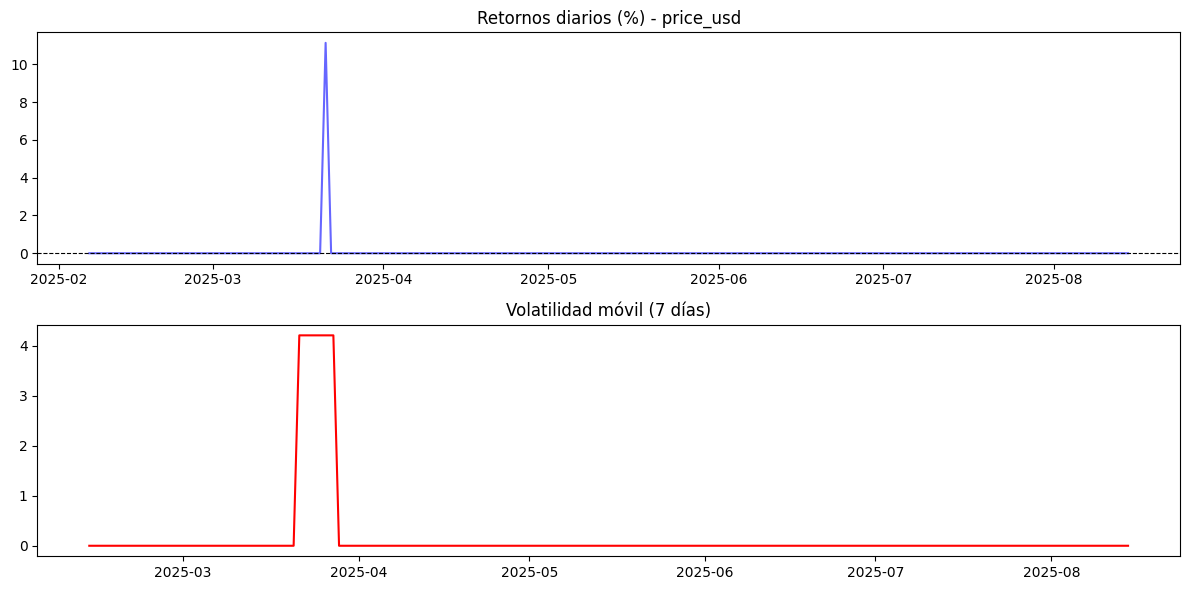

In [17]:
df_returns = returns_and_volatility(train, price_col="price_usd", window=7)